In [ ]:
#Keenan Ariqul Hashim_1301202323

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataAudit = pd.read_csv('https://github.com/keenan09/Case-Based-1_1301202323/blob/main/audit_risk.csv?raw=true')
dataTrial = pd.read_csv('https://github.com/keenan09/Case-Based-1_1301202323/blob/main/trial.csv?raw=true')

In [ ]:
#eksplore sedikit dataset

print('Shape dari data Audit {}'.format(dataAudit.shape))
print('\nShape dari data Trial {}'.format(dataTrial.shape))

print('\nColumns dari data Audit\n {}'.format(dataAudit.columns.values))
print('\nColumns dari data Trial\n {}'.format(dataTrial.columns.values))

Shape dari data Audit (776, 27)

Shape dari data Trial (776, 18)

Columns dari data Audit
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'Score_A' 'Risk_A' 'PARA_B'
 'Score_B' 'Risk_B' 'TOTAL' 'numbers' 'Score_B.1' 'Risk_C' 'Money_Value'
 'Score_MV' 'Risk_D' 'District_Loss' 'PROB' 'RiSk_E' 'History' 'Prob'
 'Risk_F' 'Score' 'Inherent_Risk' 'CONTROL_RISK' 'Detection_Risk'
 'Audit_Risk' 'Risk']

Columns dari data Trial
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'SCORE_A' 'PARA_B' 'SCORE_B'
 'TOTAL' 'numbers' 'Marks' 'Money_Value' 'MONEY_Marks' 'District' 'Loss'
 'LOSS_SCORE' 'History' 'History_score' 'Score' 'Risk']


In [ ]:
#cek kedua dataset yg memiliki value yg sama pada kolom yg sama sebelum merge

repeated_columns = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'History', 'Score', 'Risk']

for i in repeated_columns:
    a=sum(dataAudit[i]==dataTrial[i])
    if a==776:
        print('kolom {} pada kedua dataset memiliki value yang sama\n'.format(i))

kolom Sector_score pada kedua dataset memiliki value yang sama

kolom LOCATION_ID pada kedua dataset memiliki value yang sama

kolom PARA_A pada kedua dataset memiliki value yang sama

kolom PARA_B pada kedua dataset memiliki value yang sama

kolom TOTAL pada kedua dataset memiliki value yang sama

kolom numbers pada kedua dataset memiliki value yang sama

kolom History pada kedua dataset memiliki value yang sama

kolom Score pada kedua dataset memiliki value yang sama



In [ ]:
#pada data trial scoreA dan scoreB perlu dibagi 10 karena pada datasetnya berbentuk 0.ish

a=sum(dataAudit['Score_A']==dataTrial['SCORE_A']/10)
b=sum(dataAudit['Score_B']==dataTrial['SCORE_B']/10)
if a==776:
    print('kolom Score_A  memiliki value yang sama\n')
if b==776:
    print('kolom Score_B  memiliki value yang sama')

kolom Score_A  memiliki value yang sama

kolom Score_B  memiliki value yang sama


In [ ]:
print(sum(dataAudit['Money_Value']==dataTrial['Money_Value']))
print(sum(dataAudit['Risk']==dataTrial['Risk']))
print(sum(dataAudit['District_Loss']==dataTrial['District']))

775
595
776


In [ ]:
dataTrial['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
#drop data record yang bukan numeric
dataTrial=dataTrial[dataTrial['LOCATION_ID']!='LOHARU']
dataTrial=dataTrial[dataTrial['LOCATION_ID']!='NUH']
dataTrial=dataTrial[dataTrial['LOCATION_ID']!='SAFIDON']

In [ ]:
#drop kolom yang berulang pada data trial sebelum merge dengan data audit
repeated_columns = ['Sector_score', 'District','LOCATION_ID', 'PARA_A', 'SCORE_A','PARA_B','SCORE_B',
                     'TOTAL', 'numbers','Money_Value','History','Score','Risk']
dataTrial.drop(columns=repeated_columns, inplace=True, axis=1)

In [ ]:
#merge data
dataset=pd.concat([dataAudit,dataTrial], axis=1)
print(dataset)

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
0            3.89          23    4.18      0.6   2.508    2.50      0.2   
1            3.89           6    0.00      0.2   0.000    4.83      0.2   
2            3.89           6    0.51      0.2   0.102    0.23      0.2   
3            3.89           6    0.00      0.2   0.000   10.80      0.6   
4            3.89           6    0.00      0.2   0.000    0.08      0.2   
..            ...         ...     ...      ...     ...     ...      ...   
771         55.57           9    0.49      0.2   0.098    0.40      0.2   
772         55.57          16    0.47      0.2   0.094    0.37      0.2   
773         55.57          14    0.24      0.2   0.048    0.04      0.2   
774         55.57          18    0.20      0.2   0.040    0.00      0.2   
775         55.57          15    0.00      0.2   0.000    0.00      0.2   

     Risk_B  TOTAL  numbers  ...  Inherent_Risk  CONTROL_RISK  Detection_Risk  \
0     0.500   6.68

In [ ]:
#cari value yang null pada data set yg sudah di merge
dataset.isnull().any()
dataset.dropna(inplace=True)
print(dataset)

#saya memilih untuk drop baris yang berisi null daripada mengisi nilainya

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
0            3.89          23    4.18      0.6   2.508    2.50      0.2   
1            3.89           6    0.00      0.2   0.000    4.83      0.2   
2            3.89           6    0.51      0.2   0.102    0.23      0.2   
3            3.89           6    0.00      0.2   0.000   10.80      0.6   
4            3.89           6    0.00      0.2   0.000    0.08      0.2   
..            ...         ...     ...      ...     ...     ...      ...   
771         55.57           9    0.49      0.2   0.098    0.40      0.2   
772         55.57          16    0.47      0.2   0.094    0.37      0.2   
773         55.57          14    0.24      0.2   0.048    0.04      0.2   
774         55.57          18    0.20      0.2   0.040    0.00      0.2   
775         55.57          15    0.00      0.2   0.000    0.00      0.2   

     Risk_B  TOTAL  numbers  ...  Inherent_Risk  CONTROL_RISK  Detection_Risk  \
0     0.500   6.68

In [ ]:
#drop column detection risk yang hanya berisi nilai 0.5 dan juga location ID yang tidak akan membantu nantinya
dataset.drop(columns=['Detection_Risk','LOCATION_ID'],inplace=True,axis=1)

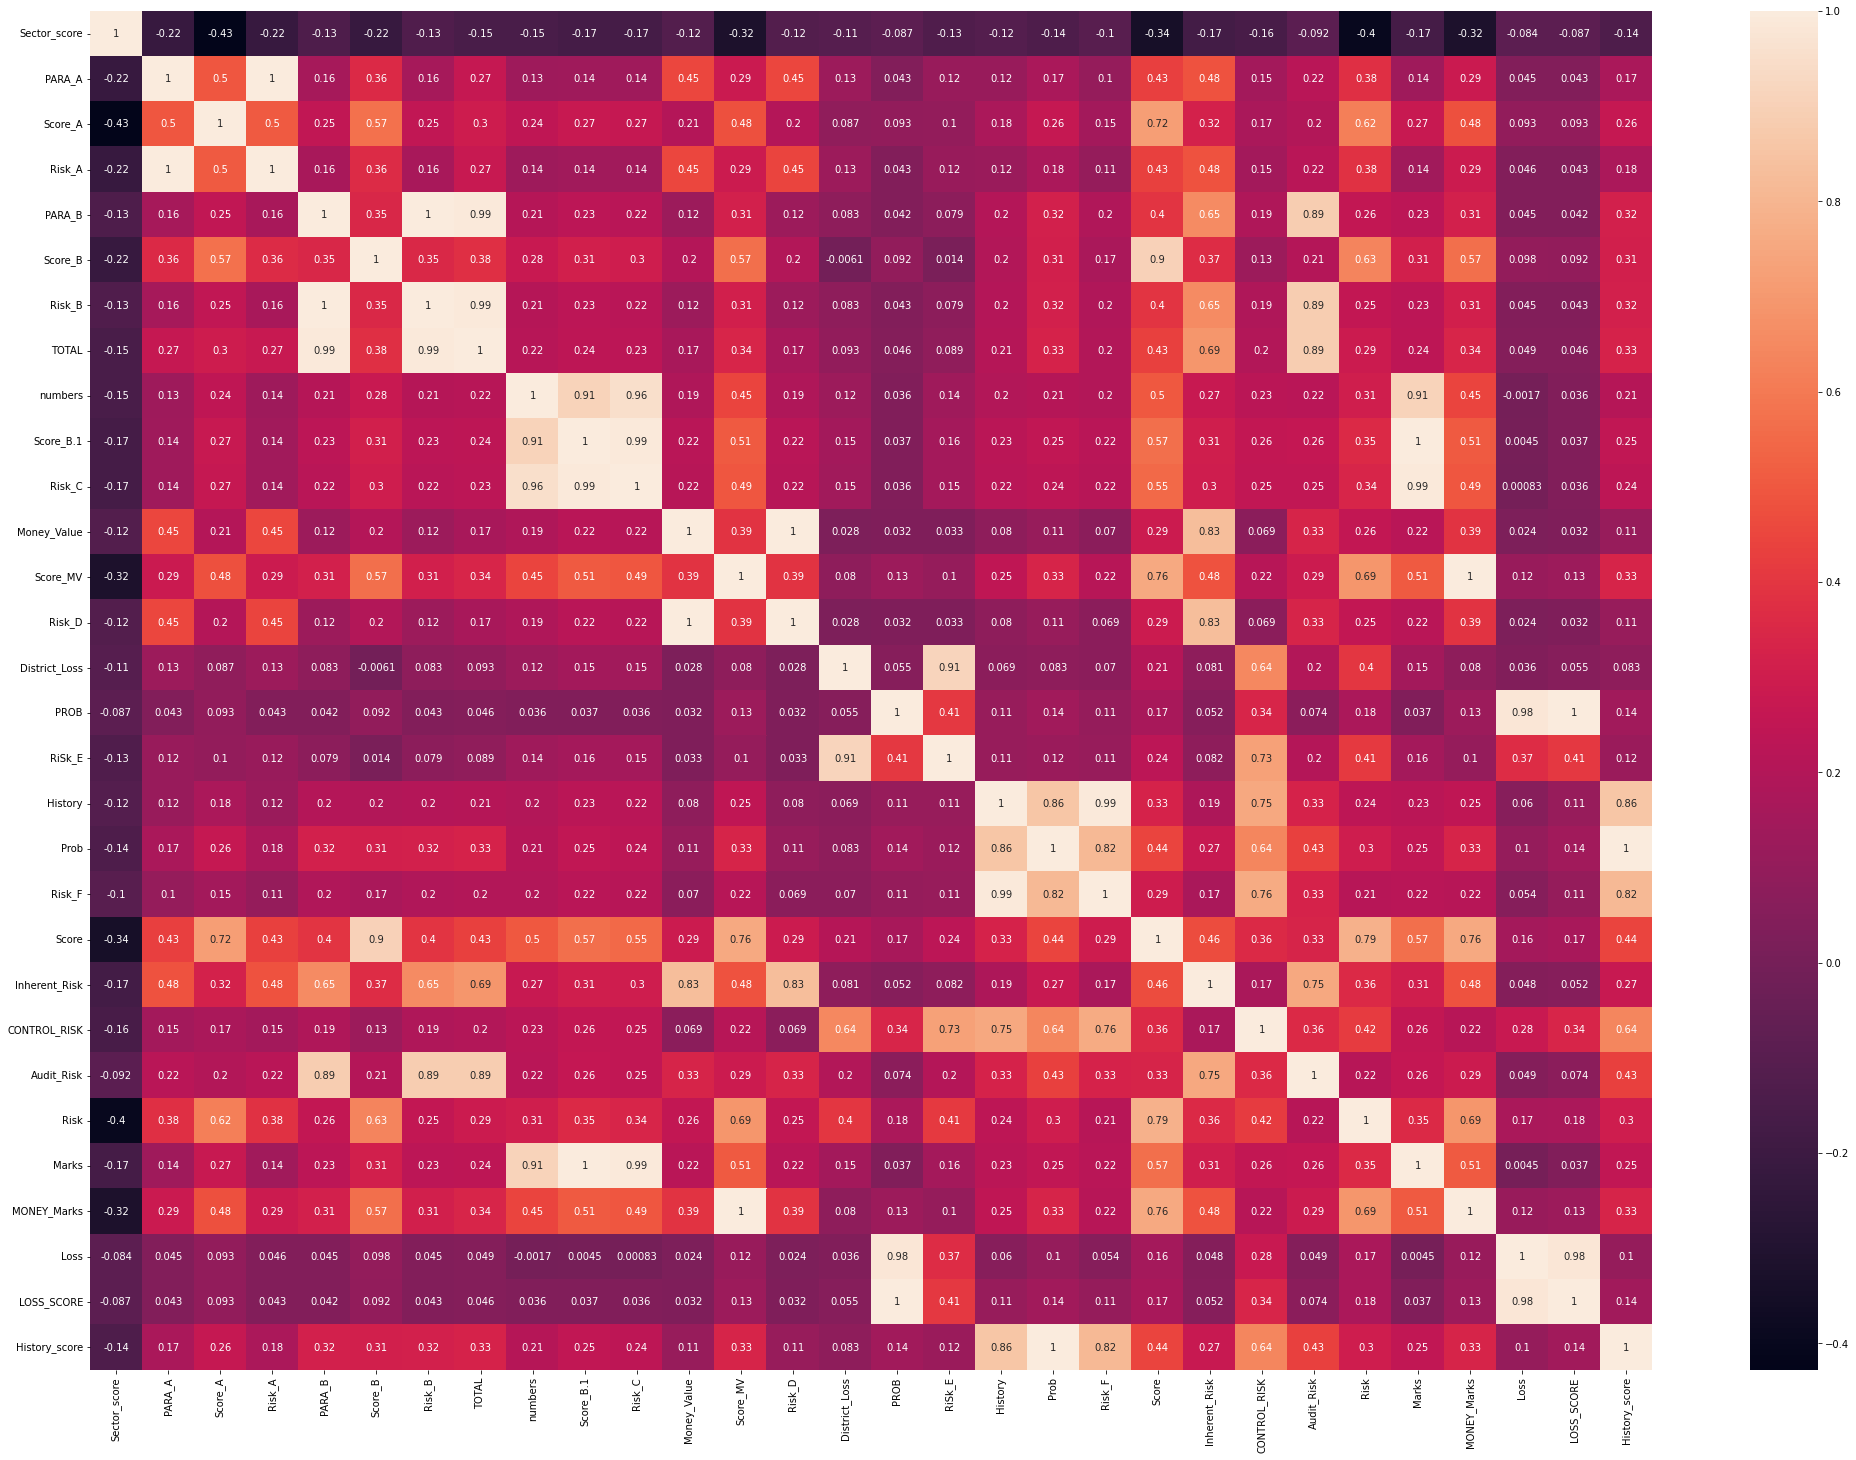

In [ ]:
plt.figure(figsize=(35,25)) 
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
print(sum(dataset['History_score']/10==dataset['Prob']))
print(sum(dataset['LOSS_SCORE']/10==dataset['PROB']))
print(sum(dataset['Score_MV']*10==dataset['MONEY_Marks']))
print(sum(dataset['Loss']==dataset['LOSS_SCORE']-2))


772
772
772
750


In [ ]:
#memutuskan mendrop salah satu dari kolom diatas yang ber value sama dengan harapan meningkatkan efisiensis saat perhitungan
dataset.drop(columns=['Score_B.1','Prob', 'PROB', 'Score_MV','LOSS_SCORE'],inplace=True,axis=1)


In [ ]:
#ketika resiko A ditambah dengan resiko lain akan equal dengan resiko inherent
a=dataset['Risk_A']+dataset['Risk_B']+dataset['Risk_C']+dataset['Risk_D']+dataset['RiSk_E']+dataset['Risk_F']
df=pd.concat([a,dataset['Inherent_Risk']],axis=1)
df=df.round(3)
sum(df[0]==df['Inherent_Risk'])

#drop resiko A hingga F, dengan harapan meningkatkan efisiensi komputasi.
dataset.drop(columns=['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F'],axis=1, inplace=True)

In [ ]:
#selanjutnya mengekplor dataset
dataset = dataset.astype(float) #set semua type data ke tipe data yg mayoritas yaitu float
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 775
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   772 non-null    float64
 1   PARA_A         772 non-null    float64
 2   Score_A        772 non-null    float64
 3   PARA_B         772 non-null    float64
 4   Score_B        772 non-null    float64
 5   TOTAL          772 non-null    float64
 6   numbers        772 non-null    float64
 7   Money_Value    772 non-null    float64
 8   District_Loss  772 non-null    float64
 9   History        772 non-null    float64
 10  Score          772 non-null    float64
 11  Inherent_Risk  772 non-null    float64
 12  CONTROL_RISK   772 non-null    float64
 13  Audit_Risk     772 non-null    float64
 14  Risk           772 non-null    float64
 15  Marks          772 non-null    float64
 16  MONEY_Marks    772 non-null    float64
 17  Loss           772 non-null    float64
 18  History_sc

In [ ]:
dataset.describe()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,Loss,History_score
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,20.209404,2.460869,0.352073,10.855947,0.313731,13.284950,5.068005,14.191093,2.507772,0.104922,2.706218,17.764268,0.573575,7.203708,0.395078,2.238342,2.914508,0.029793,2.168394
std,24.322215,5.691631,0.174163,50.207317,0.170048,51.437422,0.265089,66.730436,1.231321,0.532353,0.859652,54.869671,0.445559,38.764503,0.489184,0.805417,1.600242,0.184745,0.681523
min,1.850000,0.000000,0.200000,0.000000,0.200000,0.000000,5.000000,0.000000,2.000000,0.000000,2.000000,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,0.000000,2.000000
25%,2.370000,0.207500,0.200000,0.000000,0.200000,0.555000,5.000000,0.000000,2.000000,0.000000,2.000000,1.584000,0.400000,0.316800,0.000000,2.000000,2.000000,0.000000,2.000000
50%,3.890000,0.880000,0.200000,0.415000,0.200000,1.395000,5.000000,0.090000,2.000000,0.000000,2.400000,2.220000,0.400000,0.579600,0.000000,2.000000,2.000000,0.000000,2.000000
75%,55.570000,2.482500,0.600000,4.170000,0.400000,7.767500,5.000000,5.630000,2.000000,0.000000,3.400000,10.782000,0.400000,3.262500,1.000000,2.000000,4.000000,0.000000,2.000000
max,59.850000,85.000000,0.600000,1264.630000,0.600000,1268.910000,9.000000,935.030000,6.000000,9.000000,5.200000,801.262000,5.800000,961.514400,1.000000,6.000000,6.000000,2.000000,6.000000


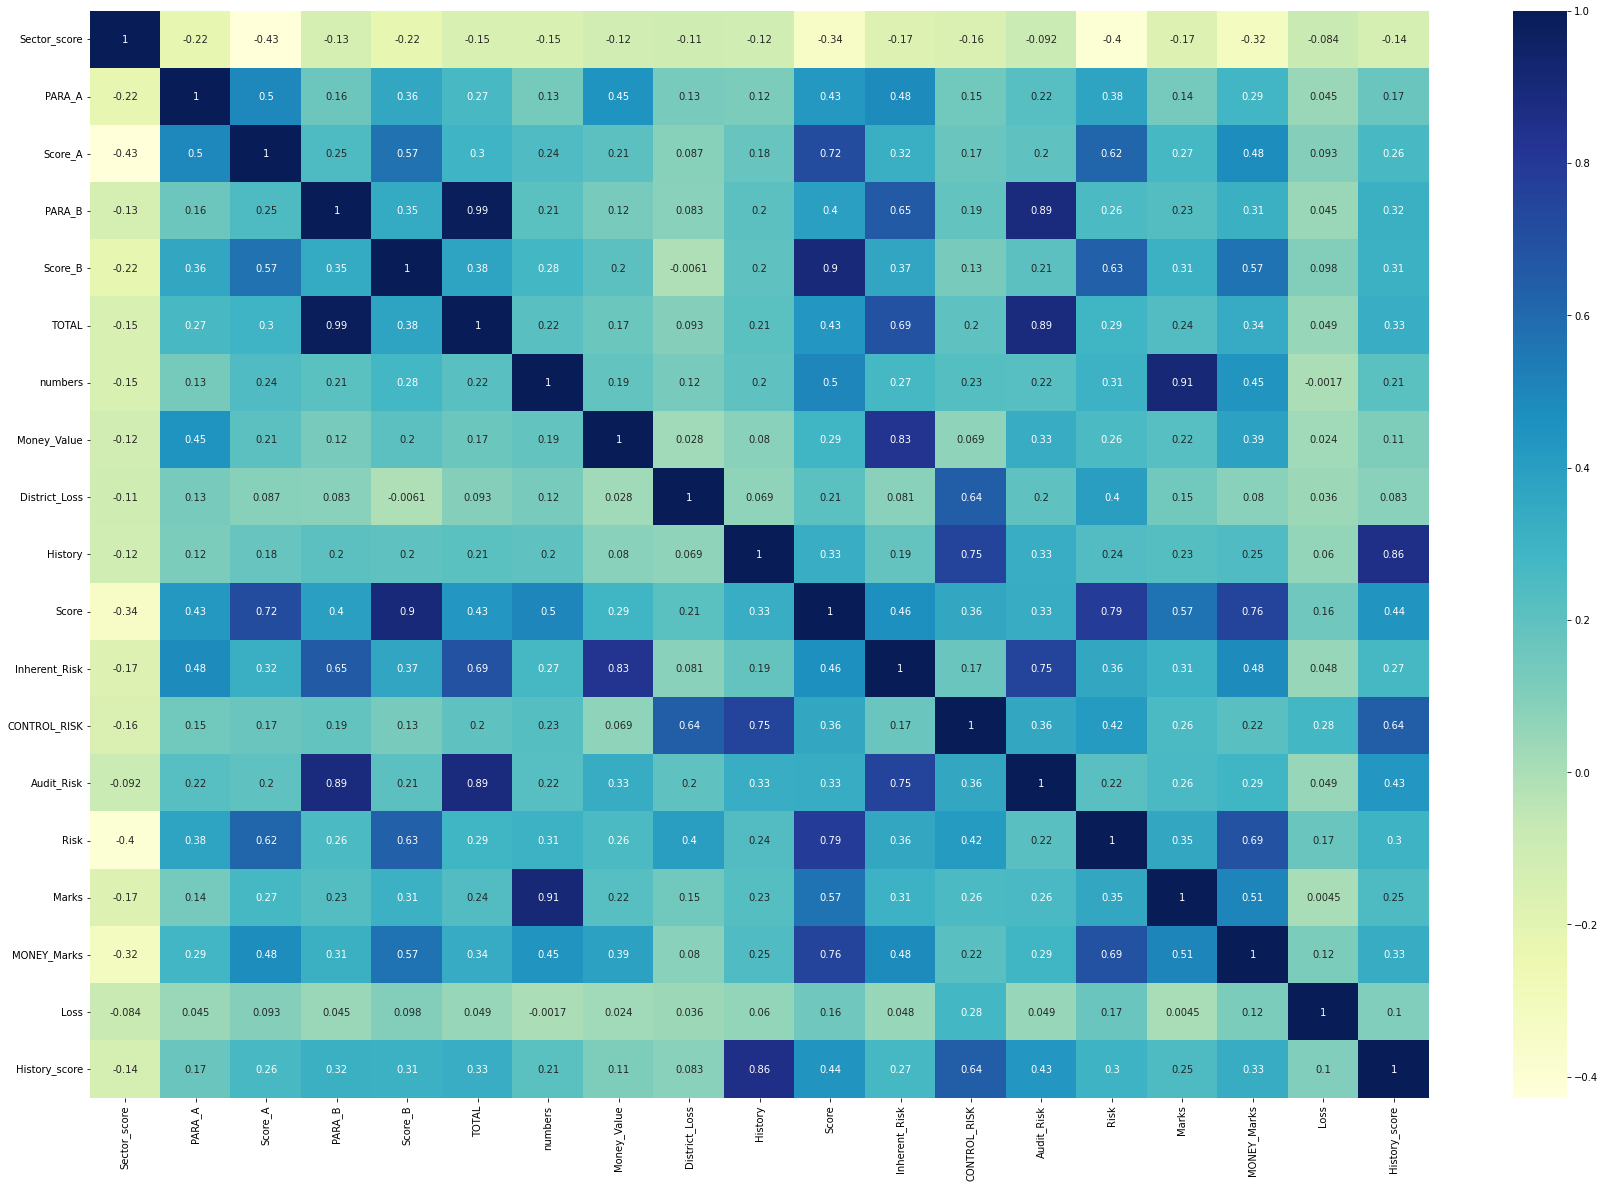

In [ ]:
#memunculkan heatmap setelah beranggapan semua column sudah tidak mempunyai value yg sama antar columnnya
plt.figure(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot=True,  cmap="YlGnBu") 

In [ ]:
# Berdasarkan warna, kita dapat memahami bagaimana berbagai variabel berkorelasi dengan variabel dependen


In [ ]:
#splitting data
X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Risk']

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)


(-0.2, 1.2)

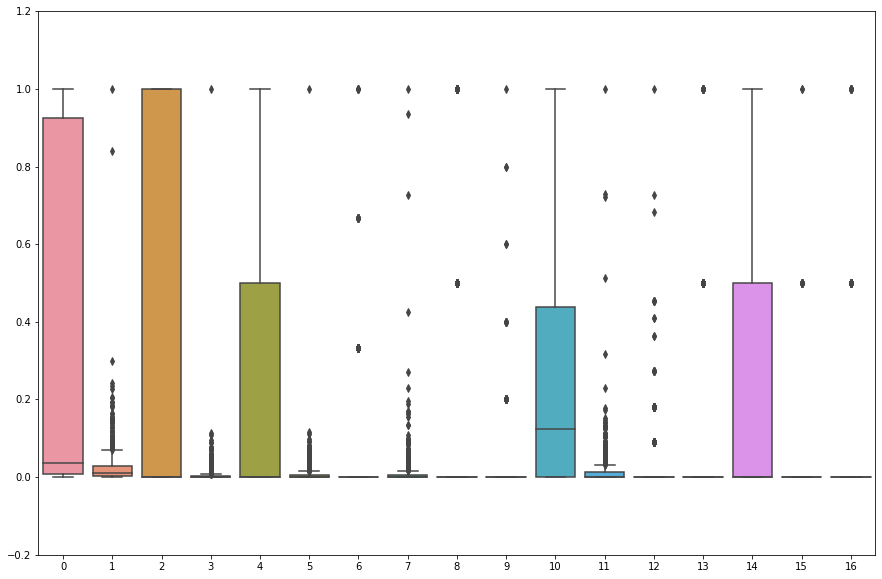

In [ ]:
#scalling data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_unscaled)
X_test=scaler.transform(X_test_unscaled)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-0.2,1.2)

In [ ]:
X_train=scaler.fit_transform(X_train_unscaled)
X_test=scaler.transform(X_test_unscaled)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 17 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
fit = model1.fit(X_train, y_train, epochs = 50, batch_size = 300, validation_split=0.2)

#step 4: evaluation
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 1s 177ms/step - loss: 0.6852 - accuracy: 0.8093 - val_loss: 0.6826 - val_accuracy: 0.8629
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 0.6817 - accuracy: 0.8479 - val_loss: 0.6791 - val_accuracy: 0.8871
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6780 - accuracy: 0.8824 - val_loss: 0.6753 - val_accuracy: 0.9032
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 0.6740 - accuracy: 0.8945 - val_loss: 0.6713 - val_accuracy: 0.9032
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 0.6697 - accuracy: 0.8945 - val_loss: 0.6667 - val_accuracy: 0.9032
Epoch 6/50
2/2 [==============================] - 0s 47ms/step - loss: 0.6649 - accuracy: 0.8945 - val_loss: 0.6617 - val_accuracy: 0.9032
Epoch 7/50
2/2 [==============================] - 0s 28ms/step - loss: 0.6598 - accuracy: 0.8945 - val_loss: 0.6562 - val_accuracy: 0.9032
Epoch 8/50
2/2 [==========

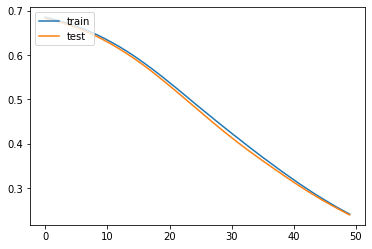

In [ ]:
# melihat data melalui diagram apakah hasil accuracy nya over fit atau tidak
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.legend(['train','test'], loc='upper left')

In [ ]:
# melihat diagram diatas dapat dilihat garis antara train dan test berdekatan dan tidak melebar satu sama lain, data tsb saya anggap tidak overfit